In [4]:
import numpy as np
import pandas as pd

In [5]:
pwd

'/home/lasal/Development/Deep Learnig SE4050/Lectrure 2'

In [7]:
df = pd.read_csv('./dataset/online_store_customer_data.csv')
df1 = df.head(10)

In [9]:
df1.to_csv('./dataset/modified.csv')

In [10]:
df.tail()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
2507,5/1/2021,153695,Female,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.10
2508,5/1/2021,153696,Female,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.88
2509,5/1/2021,153697,Male,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.07
2510,5/1/2021,153698,NaN,44.0,Single,New York,Basic,Employees,PayPal,0.0,1909.77
2511,5/1/2021,153699,Male,48.0,Single,California,Silver,workers,PayPal,1.0,1073.15


In [11]:
#taking random samples
df.sample(10)

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
1043,12/8/2019,152231,Female,25.0,Married,Delaware,Basic,Employees,Other,0.0,1348.65
1015,12/1/2019,152203,Male,48.0,Married,Kansas,Basic,Employees,PayPal,1.0,1015.45
1663,7/14/2020,152851,Male,46.0,Single,Wisconsin,Silver,workers,Other,NaN,NaN
1654,7/12/2020,152842,Female,32.0,Married,New York,Gold,Employees,PayPal,NaN,270.43
998,11/24/2019,152186,Male,66.0,Married,Utah,Silver,self-employed,Card,1.0,59.97
2203,1/19/2021,153391,Male,16.0,Single,Delaware,Silver,self-employed,Card,1.0,1707.07
656,8/2/2019,151844,Female,18.0,Single,Michigan,Missing,self-employed,PayPal,0.0,1689.33
1454,5/1/2020,152642,Female,39.0,Married,Hawaii,Gold,Employees,Card,0.0,324.40
1321,3/8/2020,152509,Male,77.0,Single,Texas,Silver,workers,Other,1.0,332.43
1793,8/27/2020,152981,Male,44.0,Married,Indiana,Basic,self-employed,PayPal,1.0,NaN


In [12]:
df.info() #overall summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2512 non-null   object 
 1   Transaction_ID    2512 non-null   int64  
 2   Gender            2484 non-null   object 
 3   Age               2470 non-null   float64
 4   Marital_status    2512 non-null   object 
 5   State_names       2512 non-null   object 
 6   Segment           2512 non-null   object 
 7   Employees_status  2486 non-null   object 
 8   Payment_method    2512 non-null   object 
 9   Referal           2357 non-null   float64
 10  Amount_spent      2270 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 216.0+ KB


In [13]:
# Null values get rid = if the emount of entries are small , 
# Null values interpolate = using mean , linear regression if large amount of values


In [14]:
df.dtypes #datatypes

Transaction_date     object
Transaction_ID        int64
Gender               object
Age                 float64
Marital_status       object
State_names          object
Segment              object
Employees_status     object
Payment_method       object
Referal             float64
Amount_spent        float64
dtype: object

In [38]:
df.describe()

,Transaction_ID,Age,Referal,Amount_spent
count,2512.000000,2470.000000,2357.000000,2270.000000
mean,152443.931131,46.637652,0.652100,1418.422577
std,724.580482,18.186277,0.476405,878.507451
min,151200.000000,15.000000,0.000000,2.090000
25%,151815.750000,32.000000,0.000000,678.192500
50%,152443.500000,47.000000,1.000000,1341.435000
75%,153071.250000,62.000000,1.000000,2038.102500
max,153699.000000,78.000000,1.000000,2999.980000


In [15]:
df.shape

(2512, 11)

In [16]:
df.columns

Index(['Transaction_date', 'Transaction_ID', 'Gender', 'Age', 'Marital_status',
       'State_names', 'Segment', 'Employees_status', 'Payment_method',
       'Referal', 'Amount_spent'],
      dtype='object')

In [17]:
 df[['Age','Gender']] #selecting subcolumns

,Age,Gender
0,19.0,Female
1,49.0,Male
2,63.0,Male
3,18.0,NaN
4,27.0,Male
...,...,...
2507,57.0,Female
2508,36.0,Female
2509,22.0,Male
2510,44.0,NaN


In [18]:
df[2:7] #2nd row to 6th row included
df[11:] #from the 11th row
df[-2:] #last 2 elements

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
2510,5/1/2021,153698,NaN,44.0,Single,New York,Basic,Employees,PayPal,0.0,1909.77
2511,5/1/2021,153699,Male,48.0,Single,California,Silver,workers,PayPal,1.0,1073.15


In [19]:
#drop unwanted column
df2 = df.copy()
df.drop(['Transaction_date'],axis=1,inplace=True)
df

,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2507,153695,Female,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.10
2508,153696,Female,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.88
2509,153697,Male,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.07
2510,153698,NaN,44.0,Single,New York,Basic,Employees,PayPal,0.0,1909.77


In [20]:
df_col = df.copy()
df_col.rename(columns={'Gender':'Sex','Segment':'Segmentation'})

,Transaction_ID,Sex,Age,Marital_status,State_names,Segmentation,Employees_status,Payment_method,Referal,Amount_spent
0,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2507,153695,Female,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.10
2508,153696,Female,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.88
2509,153697,Male,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.07
2510,153698,NaN,44.0,Single,New York,Basic,Employees,PayPal,0.0,1909.77


In [21]:
#adding columns to another df from a df
df_col['new_col'] = df2['Transaction_date']
df_col

,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent,new_col
0,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36,1/1/2019
1,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04,1/1/2019
2,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60,1/1/2019
3,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79,1/1/2019
4,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN,1/1/2019
...,...,...,...,...,...,...,...,...,...,...,...
2507,153695,Female,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.10,5/1/2021
2508,153696,Female,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.88,5/1/2021
2509,153697,Male,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.07,5/1/2021
2510,153698,NaN,44.0,Single,New York,Basic,Employees,PayPal,0.0,1909.77,5/1/2021


In [22]:
df2.loc[10]

Transaction_date      1/4/2019
Transaction_ID          151210
Gender                  Female
Age                       56.0
Marital_status         Married
State_names         California
Segment                  Basic
Employees_status     Employees
Payment_method          PayPal
Referal                    0.0
Amount_spent           1712.82
Name: 10, dtype: object

In [23]:
#changing values inside the columns
df2.loc[df.Gender == "Female","Gender"] = "Woman" # we are just changing the values of the gender column
df2.loc[df.Gender == 'Male','Gender'] = 'Man'
df2

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Woman,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Man,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Man,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Man,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2507,5/1/2021,153695,Woman,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.10
2508,5/1/2021,153696,Woman,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.88
2509,5/1/2021,153697,Man,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.07
2510,5/1/2021,153698,NaN,44.0,Single,New York,Basic,Employees,PayPal,0.0,1909.77


In [24]:
# changing data types
df2['Date'] = df2['Transaction_date'].astype('datetime64[ns]') 
df2['Referal'] = df2['Referal'].astype('float32') 
df2

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent,Date
0,1/1/2019,151200,Woman,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36,2019-01-01
1,1/1/2019,151201,Man,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04,2019-01-01
2,1/1/2019,151202,Man,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60,2019-01-01
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79,2019-01-01
4,1/1/2019,151204,Man,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
2507,5/1/2021,153695,Woman,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.10,2021-05-01
2508,5/1/2021,153696,Woman,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.88,2021-05-01
2509,5/1/2021,153697,Man,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.07,2021-05-01
2510,5/1/2021,153698,NaN,44.0,Single,New York,Basic,Employees,PayPal,0.0,1909.77,2021-05-01


In [25]:
df2.duplicated().sum() #duplicated entries

12

In [27]:
df2["State_names"].unique()

array(['Kansas', 'Illinois', 'New Mexico', 'Virginia', 'Connecticut',
       'Hawaii', 'Florida', 'Vermont', 'California', 'Colorado', 'Iowa',
       'South Carolina', 'New York', 'Maine', 'Maryland', 'Missouri',
       'North Dakota', 'Ohio', 'Nebraska', 'Montana', 'Indiana',
       'Wisconsin', 'Alabama', 'Arkansas', 'Pennsylvania',
       'New Hampshire', 'Washington', 'Texas', 'Kentucky',
       'Massachusetts', 'Wyoming', 'Louisiana', 'North Carolina',
       'Rhode Island', 'West Virginia', 'Tennessee', 'Oregon', 'Alaska',
       'Oklahoma', 'Nevada', 'New Jersey', 'Michigan', 'Utah', 'Arizona',
       'South Dakota', 'Georgia', 'Idaho', 'Mississippi', 'Minnesota',
       'Delaware'], dtype=object)

In [29]:
df2["State_names"].value_counts()

Illinois          67
Georgia           64
Massachusetts     63
Maine             62
Kentucky          59
Minnesota         59
Missouri          57
Arizona           56
Delaware          56
Arkansas          55
Nevada            55
New York          55
California        55
New Mexico        55
Vermont           54
West Virginia     54
New Jersey        53
Oregon            53
Florida           53
Connecticut       52
Washington        52
Pennsylvania      52
Colorado          52
South Dakota      52
Michigan          52
Iowa              51
Rhode Island      51
Louisiana         49
Texas             49
Montana           48
North Carolina    46
Virginia          46
Hawaii            46
Wisconsin         45
Idaho             45
Maryland          45
South Carolina    45
Wyoming           44
Mississippi       44
Oklahoma          44
Utah              43
New Hampshire     43
Indiana           43
Ohio              43
Alabama           42
Alaska            41
Nebraska          41
North Dakota 

In [30]:
#removing duplicates
df2.drop_duplicates(keep='first',inplace=True)

In [33]:
df.isna() # gives all columns where something is missing , true if something is missing

,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
2507,False,False,False,False,False,False,False,False,False,False
2508,False,False,False,False,False,False,False,False,False,False
2509,False,False,False,False,False,False,False,False,False,False
2510,False,True,False,False,False,False,False,False,False,False


In [32]:
#Handling missing values
df.isna().sum().sort_values(ascending=False)

Amount_spent        242
Referal             155
Age                  42
Gender               28
Employees_status     26
Transaction_ID        0
Marital_status        0
State_names           0
Segment               0
Payment_method        0
dtype: int64

In [35]:
#dropping na columns
df_nan = df2.copy()
df_nan.dropna(subset=["Employees_status"],inplace=True) #if subset is not given all rows with an na column will be droped but subset can be given and if that specific colimn has an nan value the row will be droped

In [36]:
#Inmpute missing values

#1) Impute with 0,'Unknown' or 'Missing'

df2['Gender'].fillna('Unknown',inplace=True)

In [37]:
#Impute Mean, Median, Mode
mean_amount_spent = df2['Amount_spent'].mean()
df2['Amount_spent'].fillna(mean_amount_spent, inplace=True)

#Impute Median in Age column
median_age = df2['Age'].median()
df2['Age'].fillna(median_age, inplace=True)

# Impute Mode in Employees_status column
mode_emp = df2['Employees_status'].mode().iloc[0]
df2['Employees_status'].fillna(mode_emp, inplace=True)

In [39]:
# Calculate Mean
mean = df2['Age'].mean()

# Calculate Median
median = df2['Age'].median()

#Calculate Mode
mode = df2['Age'].mode().iloc[0]

# Calculate standard deviation
std = df2['Age'].std()

# Calculate Minimum values
minimum = df2['Age'].min()

# Calculate Maximum values
maximum = df2.Age.max()

print(f" Mean of Age : {mean}")
print(f" Median of Age : {median}")
print(f" Mode of Age : {mode}")
print(f" Standard deviation of Age : {std:.2f}")
print(f" Maximum of Age : {maximum}")
print(f" Menimum of Age : {minimum}")


 Mean of Age : 46.636
 Median of Age : 47.0
 Mode of Age : 47.0
 Standard deviation of Age : 18.02
 Maximum of Age : 78.0
 Menimum of Age : 15.0


In [41]:
df.corr(numeric_only=True)

,Transaction_ID,Age,Referal,Amount_spent
Transaction_ID,1.000000,-0.009019,-0.002859,-0.006672
Age,-0.009019,1.000000,0.013423,-0.023342
Referal,-0.002859,0.013423,1.000000,-0.006779
Amount_spent,-0.006672,-0.023342,-0.006779,1.000000


In [42]:
#Group By multiple columns
state_gender_res = df2[['State_names','Gender','Payment_method','Amount_spent']].groupby([ 'State_names','Gender', 'Payment_method']).agg(['count', 'min', 'max'])
state_gender_res.head(12)

Amount_spent                  
                                          count      min      max
State_names Gender  Payment_method                               
Alabama     Man     Card                      6   221.17  2735.65
                    Other                     4   459.47  1691.62
                    PayPal                   11    87.88  2876.36
            Unknown PayPal                    1  1716.37  1716.37
            Woman   Card                      8   413.11  2749.37
                    Other                     6   851.25  2789.52
                    PayPal                    6    77.90  2520.85
Alaska      Man     Card                      1  2497.31  2497.31
                    Other                     8   588.88  2977.82
                    PayPal                    8    91.32  1834.95
            Woman   Card                      6   141.50  1988.38
                    Other                     8   489.16  2970.00

In [43]:
pd.crosstab(df2.Marital_status, df2.Payment_method)

Payment_method,Card,Other,PayPal
Marital_status,,,
Married,440,357,667
Single,307,232,497


<AxesSubplot: xlabel='Age'>

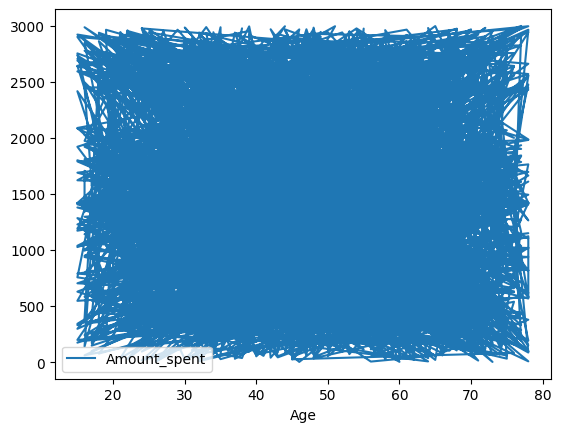

In [44]:
#data visualizatiom using pandas
df2.plot('Age','Amount_spent')

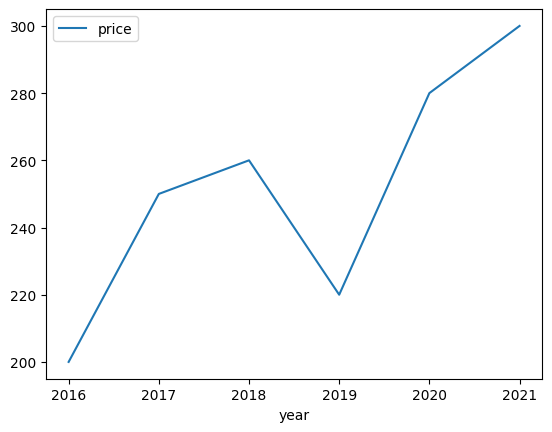

In [45]:
dict_line = {
    'year': [2016, 2017, 2018, 2019, 2020, 2021],
    'price': [200, 250, 260, 220, 280, 300]
}
df_line = pd.DataFrame(dict_line)
# use plot() method on the dataframe
df_line.plot('year', 'price');

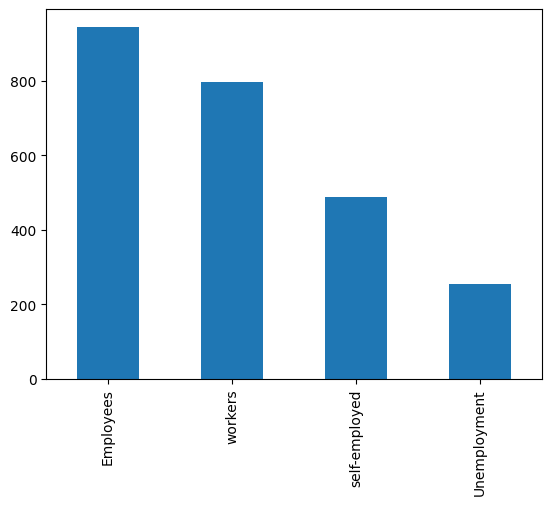

In [46]:
df['Employees_status'].value_counts().plot(kind='bar');

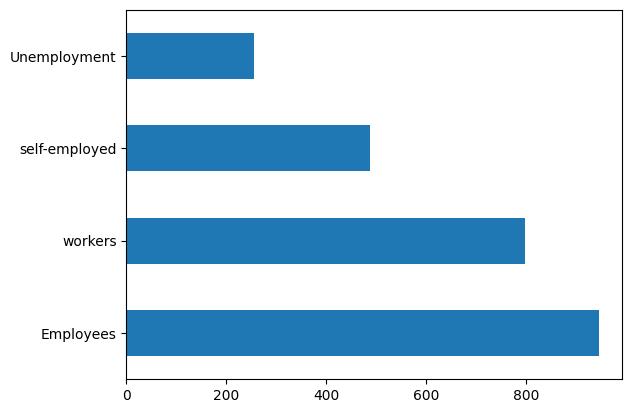

In [47]:
df['Employees_status'].value_counts().plot(kind='barh');

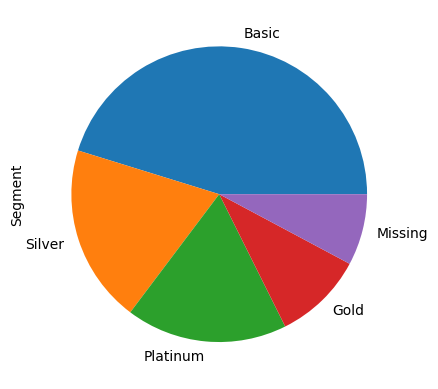

In [48]:


df['Segment'].value_counts().plot(
    kind='pie');



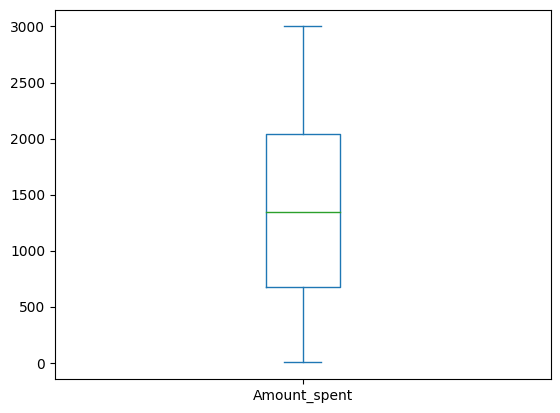

In [49]:
df.plot(y=['Amount_spent'], kind='box');


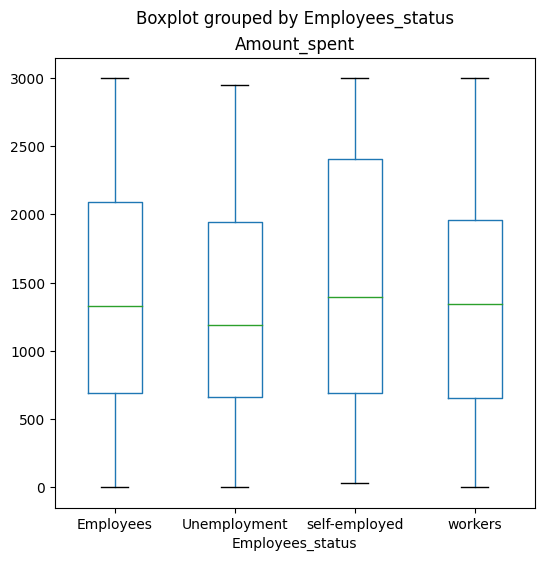

In [50]:
import matplotlib.pyplot as plt

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
fig, ax = plt.subplots(figsize=(6,6)) 

df.boxplot(by ='Employees_status', column =['Amount_spent'],ax=ax, grid = False);
